In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
data = pd.read_excel('D:/competition/penguinCount.xlsx')
data.head()

,site_name,site_id,cammlr_region,longitude_epsg_4326,latitude_epsg_4326,common_name,day,month,year,season_starting,penguin_count,accuracy,count_type,vantage,reference
0,Neko Harbor (Andvord Bay),NEKO,48.1,-62.533,-64.838,gentoo penguin,4.0,2.0,1987,1986,397,1,chicks,ground,<p>Poncet S. and J. Poncet (1987). &ldquo;Cen...
1,Neko Harbor (Andvord Bay),NEKO,48.1,-62.533,-64.838,gentoo penguin,3.0,2.0,1996,1995,934,1,chicks,ground,<p>Lynch H. J. R. Naveen and P. Casanovas (...
2,Neko Harbor (Andvord Bay),NEKO,48.1,-62.533,-64.838,gentoo penguin,23.0,1.0,1999,1998,625,1,chicks,ground,<p>Lynch H. J. R. Naveen and P. Casanovas (...
3,Neko Harbor (Andvord Bay),NEKO,48.1,-62.533,-64.838,gentoo penguin,24.0,1.0,2000,1999,1320,1,chicks,ground,<p>Lynch H. J. R. Naveen and P. Casanovas (...
4,Neko Harbor (Andvord Bay),NEKO,48.1,-62.533,-64.838,gentoo penguin,16.0,12.0,1999,1999,864,1,nests,ground,<p>Lynch H. J. R. Naveen and P. Casanovas (...


In [4]:
data.shape

(219, 15)

This dataset has 219 rows and 15 columns.

In [5]:
penguin_counts = pd.DataFrame(data, columns = ['site_name', 'common_name', 'year', 'penguin_count', 'count_type'])

In [6]:
# Create another column giving the number of years since 1985
penguin_counts['years after 1985'] = (penguin_counts['year'] - 1985)

In [7]:
print(penguin_counts)

                     site_name     common_name  year  penguin_count  \
0    Neko Harbor (Andvord Bay)  gentoo penguin  1987            397   
1    Neko Harbor (Andvord Bay)  gentoo penguin  1996            934   
2    Neko Harbor (Andvord Bay)  gentoo penguin  1999            625   
3    Neko Harbor (Andvord Bay)  gentoo penguin  2000           1320   
4    Neko Harbor (Andvord Bay)  gentoo penguin  1999            864   
..                         ...             ...   ...            ...   
214           Petermann Island  gentoo penguin  2015           3085   
215           Petermann Island  gentoo penguin  2015           3905   
216           Petermann Island  gentoo penguin  2018           3516   
217           Petermann Island  gentoo penguin  2020           3498   
218           Petermann Island  gentoo penguin  2020           4960   

    count_type  years after 1985  
0       chicks                 2  
1       chicks                11  
2       chicks                14  
3      

In [8]:
adelie_counts = penguin_counts.loc[(penguin_counts['common_name']=='adelie penguin') & (penguin_counts['count_type']=='nests') & (penguin_counts['site_name'] == 'Petermann Island'), ['site_name', 'common_name','years after 1985', 'penguin_count', 'count_type']]

In [34]:
average_adelie = adelie_counts['penguin_count'].mean()
print(f"Average Adelie Penguins: {int(average_adelie)}")

Average Adelie Penguins: 527


In [10]:
adelie_counts

,site_name,common_name,years after 1985,penguin_count,count_type
131,Petermann Island,adelie penguin,-3,987,nests
132,Petermann Island,adelie penguin,3,1080,nests
133,Petermann Island,adelie penguin,9,807,nests
134,Petermann Island,adelie penguin,9,793,nests
135,Petermann Island,adelie penguin,9,704,nests
136,Petermann Island,adelie penguin,10,806,nests
137,Petermann Island,adelie penguin,10,827,nests
138,Petermann Island,adelie penguin,10,822,nests
139,Petermann Island,adelie penguin,10,813,nests
140,Petermann Island,adelie penguin,10,793,nests


In [11]:
gentoo_counts = penguin_counts.loc[(penguin_counts['common_name']=='gentoo penguin') & (penguin_counts['count_type']=='nests') & (penguin_counts['site_name']== 'Neko Harbor (Andvord Bay)'), ['site_name', 'common_name','years after 1985', 'penguin_count', 'count_type']]

In [33]:
average_gentoo = gentoo_counts['penguin_count'].mean()
print(f"Average Gentoo Penguins: {int(average_gentoo)}")

Average Gentoo Penguins: 1115


In [13]:
gentoo_counts

,site_name,common_name,years after 1985,penguin_count,count_type
4,Neko Harbor (Andvord Bay),gentoo penguin,14,864,nests
5,Neko Harbor (Andvord Bay),gentoo penguin,18,1042,nests
6,Neko Harbor (Andvord Bay),gentoo penguin,17,1072,nests
8,Neko Harbor (Andvord Bay),gentoo penguin,18,1088,nests
9,Neko Harbor (Andvord Bay),gentoo penguin,20,869,nests
10,Neko Harbor (Andvord Bay),gentoo penguin,19,1009,nests
11,Neko Harbor (Andvord Bay),gentoo penguin,19,1096,nests
13,Neko Harbor (Andvord Bay),gentoo penguin,20,1101,nests
14,Neko Harbor (Andvord Bay),gentoo penguin,20,1301,nests
15,Neko Harbor (Andvord Bay),gentoo penguin,21,1153,nests


In [14]:
chinstrap_counts = penguin_counts.loc[(penguin_counts['common_name']=='chinstrap penguin') & (penguin_counts['count_type']=='nests') & (penguin_counts['penguin_count'] > 1) & (penguin_counts['site_name']=='Orne Islands'), ['site_name', 'common_name','years after 1985', 'penguin_count', 'count_type']]

In [35]:
average_chinstrap = chinstrap_counts['penguin_count'].mean()
print(f"Average Chinstrap Penguins: {int(average_chinstrap)}")

Average Chinstrap Penguins: 358


In [16]:
chinstrap_counts

,site_name,common_name,years after 1985,penguin_count,count_type
69,Orne Islands,chinstrap penguin,-1,340,nests
70,Orne Islands,chinstrap penguin,2,860,nests
71,Orne Islands,chinstrap penguin,8,521,nests
72,Orne Islands,chinstrap penguin,9,420,nests
73,Orne Islands,chinstrap penguin,10,431,nests
74,Orne Islands,chinstrap penguin,11,342,nests
75,Orne Islands,chinstrap penguin,12,423,nests
76,Orne Islands,chinstrap penguin,13,370,nests
77,Orne Islands,chinstrap penguin,13,361,nests
79,Orne Islands,chinstrap penguin,14,421,nests


In [17]:
chinstrap_counts.describe()

,years after 1985,penguin_count
count,25.000000,25.000000
mean,17.560000,358.920000
std,8.841568,130.549454
min,-1.000000,106.000000
25%,12.000000,299.000000
50%,16.000000,340.000000
75%,25.000000,396.000000
max,31.000000,860.000000


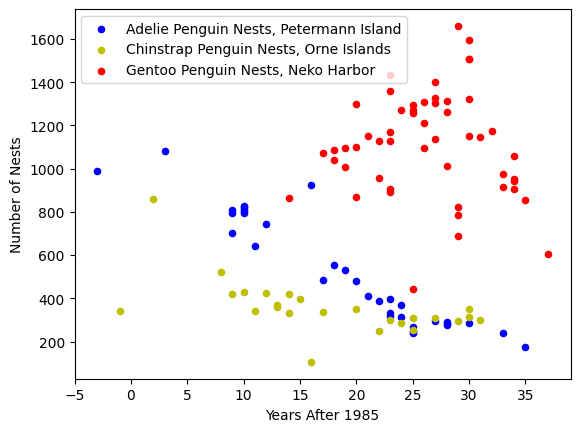

In [18]:
ax1= adelie_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label='Chinstrap Penguin Nests, Orne Islands', color = 'y', ax=ax1)
gentoo_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label= 'Gentoo Penguin Nests, Neko Harbor', color='r', ax=ax1)
ax1.set_xlabel("Years After 1985")
ax1.set_ylabel("Number of Nests")
plt.show()

<h5>Summary</h5>
<p>Gentoo penguin populations began to increase as the years passed, and the gentoo penguin population increased yearly until it reached a point of stability and began to decline. The Adelie penguin population declined as the years passed, whereas the chinstrap penguin population remained stable until it perished.</P>

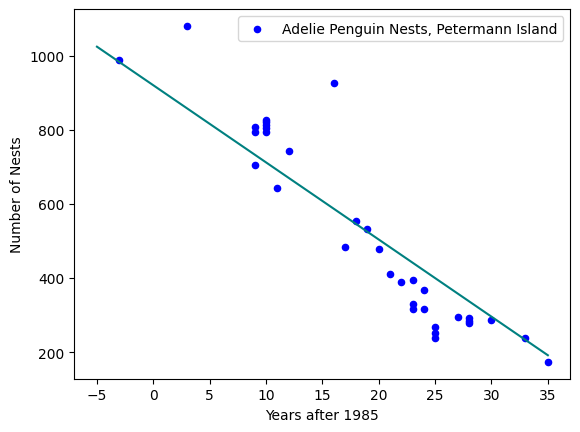

In [19]:
adelie_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
x = np.linspace(-5, 35, 100)

#Replace m and b in the line of code below
y = -20.8*x +920


plt.plot(x, y, color='teal')
plt.xlabel('Years after 1985')
plt.ylabel('Number of Nests')
plt.show()

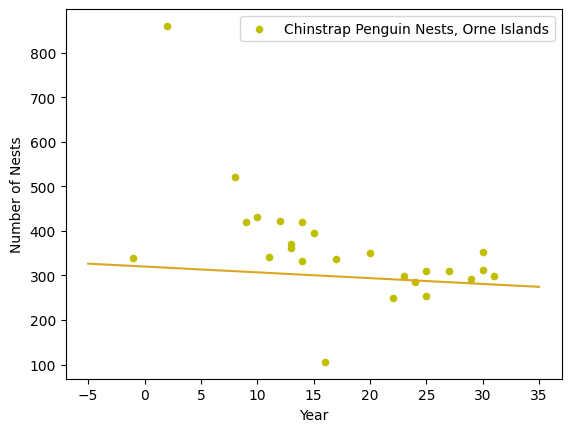

In [20]:
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label = 'Chinstrap Penguin Nests, Orne Islands', color='y')
x = np.linspace(-5, 35, 100)


#Replace m and b with the values you calculated
y = -1.3*x + 320

plt.plot(x, y, color='goldenrod')
plt.xlabel('Year')
plt.ylabel('Number of Nests')
plt.show()

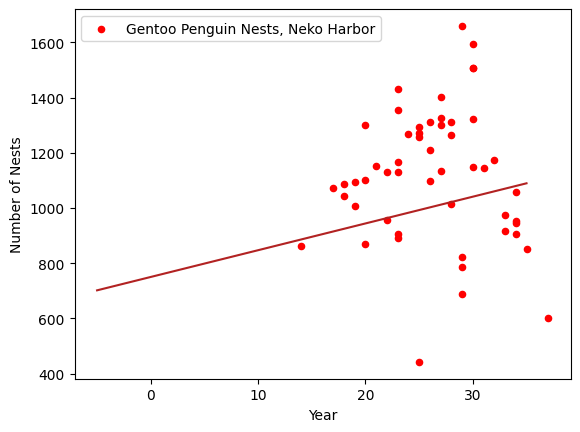

In [21]:
gentoo_counts.plot(kind='scatter', x='years after 1985', y='penguin_count', label = 'Gentoo Penguin Nests, Neko Harbor', color='r')
x = np.linspace(-5, 35, 100)


#Replace m and b with the values you calculated
y = 9.7*x + 750

gentoo_fit = plt.plot(x, y, color='firebrick')
plt.xlabel('Year')
plt.ylabel('Number of Nests')
plt.show()

In [36]:
# Calculate the total penguin count
total_penguins = average_chinstrap + average_adelie + average_gentoo

In [37]:
# Calculate the percentage for each species
percentage_adelie = (average_adelie / total_penguins) * 100
percentage_chinstrap = (average_chinstrap / total_penguins) * 100
percentage_gentoo = (average_gentoo / total_penguins) * 100

In [39]:
# Print the results
print(f"Adelie Penguins: {percentage_adelie:.2f}%")
print(f"Chinstrap Penguins: {percentage_chinstrap:.2f}%")
print(f"Gentoo Penguins: {percentage_gentoo:.2f}%")

Adelie Penguins: 26.34%
Chinstrap Penguins: 17.93%
Gentoo Penguins: 55.74%


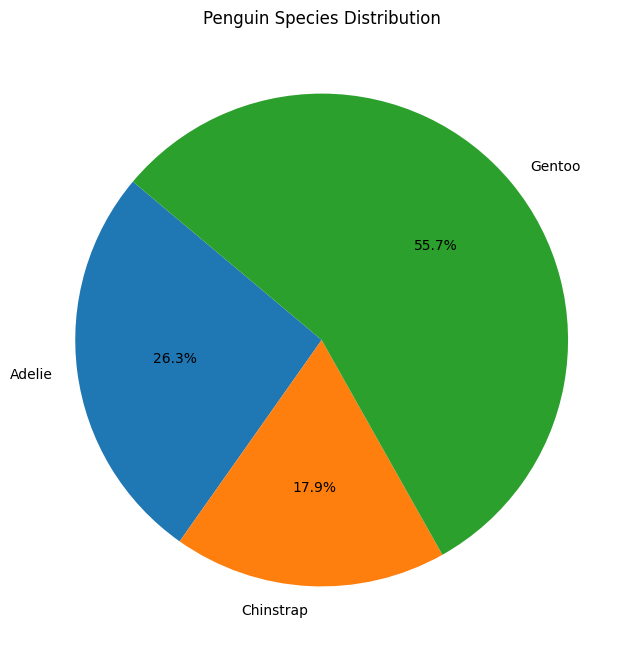

In [40]:
# Data for the pie chart
labels = ['Adelie', 'Chinstrap', 'Gentoo']
sizes = [percentage_adelie, percentage_chinstrap, percentage_gentoo]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Penguin Species Distribution')

# Display the chart
plt.show()

<h5>Summary</h5>
<p>The Adelie penguin population has been declining over time. It is due to the Adelie penguin's reliance on sea ice for breeding, shedding its skin, and hunting. 
The gentoo population is increasing as the year passed and have the biggest populations among three penguin populations. Furthermore, chinstrap population have a maintain its population but both gentoo and chinstrap starts to decline.  
Gentoo penguins are the largest of the three species, accounting for 55.7% of the total population. The chinstrap penguin only has 17.9% population which is the smallest because they are struggling to survive due to global warming.
Global warming has always occurred over time, resulting in changes in temperature, ice cover, and ocean conditions. As a result, sea ice melts, reducing the availability of suitable habitat for penguins.
</P>